## RATON BASIN GEOTHERMAL WELL DATA

MS-48 Series Description of Oil and Gas Wells with Predicted Geothermal Properties Database
Geothermal gradient and heat flow were estimated for all wells contained in the Colorado Oil and Gas Conservation Commission’s (COGCC) oil and gas well shapefile (http://cogcc.state.co.us/) downloaded on June 4, 2009. According to the provided locations, each well was assigned geothermal properties (gradient and heat flow) using the interpreted gradient and heat flow zones shown in the Colorado Geological Survey publications, MS-51 Interpretive Geothermal Gradient Map of Colorado and MS-45 Interpretive Geothermal Heat Flow Map of Colorado.

Tier 1: HF >150 mW/m2, Grad >70 degC/km

Tier 2: HF 120-150 mW/m2, Grad 60-70 degC/km

Tier 3: HF 90-120 mW/m2, Grad 50-60 degC/km

Tier 4: HF <90 mW/m2, Grad <50 degC/km

##### Some functions adapted from https://sainosmichelle.github.io/elements.html

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_MS48 = pd.read_excel('s3://geotermaldata/S3RATONDATA/Oil_Gas_Wells_with_Predicted_Geothermal_Properties.xlsx')

In [9]:
len(df_MS48)

88376

#### Extracting only wells at Raton Basin

In [10]:
twp_list = ['27S','28S','29S','30S','31S', '32S', '33S', '34S', '35S']
range_list = ['64W', '65W', '66W', '67W', '68W', '69W']
temp = df_MS48[df_MS48['twp'].isin(twp_list)] 
df_MS48_Raton = temp[temp['range'].isin(range_list)] 
len(df_MS48_Raton)

3952

In [11]:
print(df_MS48_Raton.api.values)

['05-055-06148' '05-055-06152' '05-071-09485' ... '05-071-08269'
 '05-071-08268' '05-055-06286']


In [12]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_MS48_Raton['long_'],
        lat = df_MS48_Raton['lat'],
        text = df_MS48_Raton['HF_Tier'],
        marker = dict(
        color = df_MS48_Raton['HF_Tier'],
        colorscale = 'Rainbow',
        reversescale = True,
        opacity = 0.7,
        size = 5,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 1
        )
    )
        ))
fig.update_traces(marker=dict(size=15),
                  selector=dict(mode='markers'))
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=25),
    title = 'MS 48 Oil and Gas Wells with Predicted Geothermal Properties - Raton Basin',
    geo_scope='usa',
    )
fig.show()

In [13]:
print(df_MS48_Raton.columns)

Index(['OBJECTID', 'link_fld', 'api', 'operator', 'well', 'symbol', 'sdf_key',
       'id', 'type', 'status', 'oper_num', 'well_num', 'well_name',
       'field_code', 'dist_n_s', 'dir_n_s', 'dist_e_w', 'dir_e_w', 'qtrqtr',
       'sec', 'twp', 'range', 'meridian', 'lat', 'long_', 'ground_ele',
       'utm_x', 'utm_y', 'LocQual', 'field_name', 'name', 'api_seq_nu',
       'api_county', 'HF_Range', 'Gradient_R', 'HF_Tier', 'Gradient_T'],
      dtype='object')


In [14]:
df_MS48_Raton['HF_Tier'].unique()

array([4, 1, 2, 3])

<AxesSubplot:>

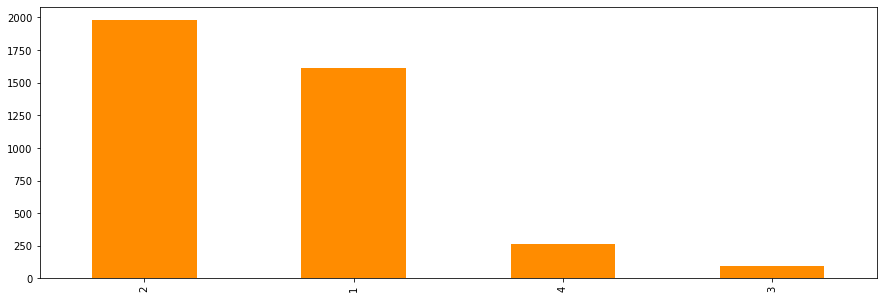

In [15]:
df_MS48_Raton['HF_Tier'].value_counts().plot(kind='bar', figsize=(15,5), grid=False, color='darkorange' )

Tier 1: HF >150 mW/m2, Grad >70 degC/km

Tier 2: HF 120-150 mW/m2, Grad 60-70 degC/km

Tier 3: HF 90-120 mW/m2, Grad 50-60 degC/km

Tier 4: HF <90 mW/m2, Grad <50 degC/km